## Find CRCM5 simulation for testing method identity

In [2]:
import xscen as xc
cat = xc.DataCatalog('/tank/scenario/catalogues/MRCC5-disponible.json')
cat.unique()

code                   [bbh, bbi, bbj, bbk, bbl, bbm, bbn, bbo, bbr, ...
frequency                                       [fx, mon, 3hr, 1hr, day]
date_start             [1950-01-01 00:00:00, 1950-02-01 00:00:00, 195...
variable               [areacella, baresoilFrac_max, baresoilFrac_min...
path                   [/expl6/climato/arch/bbh/invariants/areacella_...
format                                                              [nc]
date_end               [1950-01-31 23:00:00, 1950-02-28 23:00:00, 195...
xrfreq                                                [fx, MS, 3H, H, D]
type                                                       [simulations]
processing_level                                                   [raw]
institution                                                    [OURANOS]
source                                                           [CRCM5]
activity                                                         [MRCC5]
description            [simulation membre #2 | EBQ 

In [3]:
cat.unique('xrfreq')

['fx', 'MS', '3H', 'H', 'D']

## Checking for the bug in time_bnds of 'pr' files

#### Are there quotes in the time_bnds variable?

In [3]:
from netCDF4 import Dataset
import xscen as xc
cat = xc.DataCatalog('/tank/scenario/catalogues/MRCC5-disponible.json')
#bcs_files = cat.search(code=['bcs'], variable=['tas', 'pr'], periods=['197912', '198511']).unique('path')
bcs_files = cat.search(code=['bcs'], variable=['pr'], periods=['1979', '1985']).unique('path')
for file in sorted(bcs_files):
    ds = Dataset(file, 'r', format="NETCDF4")
    print(f'File {file}, time_bnds: {ds.variables["time_bnds"].units}', end='')
    if " \"d" in ds.variables['time_bnds'].units:
        print(f'Quotes with escape found!')
ds

File /expl7/climato/arch/bcs/series/197901/pr_bcs_197901_se.nc, time_bnds:  "days since 1978-12-31 23:00:00" Quotes with escape found!
File /expl7/climato/arch/bcs/series/197902/pr_bcs_197902_se.nc, time_bnds:  "days since 1978-12-31 23:00:00" Quotes with escape found!
File /expl7/climato/arch/bcs/series/197903/pr_bcs_197903_se.nc, time_bnds:  "days since 1978-12-31 23:00:00" Quotes with escape found!
File /expl7/climato/arch/bcs/series/197904/pr_bcs_197904_se.nc, time_bnds:  "days since 1978-12-31 23:00:00" Quotes with escape found!
File /expl7/climato/arch/bcs/series/197905/pr_bcs_197905_se.nc, time_bnds:  "days since 1978-12-31 23:00:00" Quotes with escape found!
File /expl7/climato/arch/bcs/series/197906/pr_bcs_197906_se.nc, time_bnds:  "days since 1978-12-31 23:00:00" Quotes with escape found!
File /expl7/climato/arch/bcs/series/197907/pr_bcs_197907_se.nc, time_bnds:  "days since 1978-12-31 23:00:00" Quotes with escape found!
File /expl7/climato/arch/bcs/series/197908/pr_bcs_19790

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.6
    contact: paquin.dominique@ouranos.ca
    comment: CRCM5 v3331 0.22 deg AMNO22d2 L56 S17-15m ERA-INTERIM 0,75d PILSPEC PS3
    creation_date: 2017-12-07 
    experiment: simulation de reference 
    experiment_id: bcs 
    driving_experiment: ERA-INTERIM 
    driving_model_id: ECMWF-ERAINT 
    driving_model_ensemble_member: r1i1p1 
    driving_experiment_name: evaluation 
    institution: Ouranos 
    institute_id: Our. 
    model_id: OURANOS-CRCM5
    rcm_version_id: v3331
    project_id: 
    ouranos_domain_name: AMNO22d2 
    ouranos_run_id: bcs OURALIB 1.4.1
    product: output
    reference: http://www.ouranos.ca
    history: Sat Jan 13 23:09:11 2018: ncks -O --chunk_policy g3d --cnk_dmn plev,1 --cnk_dmn rlon,50 --cnk_dmn rlat,50 --cnk_dmn time,250 /localscratch/4081647.gm-1r16-n04.guillimin.clumeq.ca/bcs/bcs/198512/nc4c_pr_bcs_198512_se.nc /localscratch/408164

In [6]:
import xarray as xr
cat = xc.DataCatalog('/tank/scenario/catalogues/MRCC5-disponible.json')
bcs_files = cat.search(code=['bcs'], variable=['tas'], periods=['1979', '1985']).unique('path')
ds = xr.open_dataset(bcs_files[0])

display(bcs_files[0], ds)

'/expl7/climato/arch/bcs/series/197908/tas_bcs_197908_se.nc'

<xarray.Dataset>
Dimensions:       (height: 1, rlat: 300, rlon: 340, time: 248)
Coordinates:
  * height        (height) float64 2.0
    lat           (rlat, rlon) float64 ...
    lon           (rlat, rlon) float64 ...
  * rlat          (rlat) float64 -30.71 -30.49 -30.27 ... 34.63 34.85 35.07
  * rlon          (rlon) float64 -33.99 -33.77 -33.55 ... 40.15 40.37 40.59
  * time          (time) datetime64[ns] 1979-08-01 ... 1979-08-31T21:00:00
Data variables:
    rotated_pole  |S1 ...
    tas           (time, rlat, rlon) float32 ...
Attributes: (12/21)
    Conventions:                    CF-1.6
    contact:                        paquin.dominique@ouranos.ca
    comment:                        CRCM5 v3331 0.22 deg AMNO22d2 L56 S17-15m...
    creation_date:                  2017-12-07 
    experiment:                     simulation de reference 
    experiment_id:                  bcs 
    ...                             ...
    ouranos_domain_name:            AMNO22d2 
    ouranos_run_id:                 bcs OURALIB 1.4.1
    product:                        output
    reference:                      http://www.ouranos.ca
    history:                        Thu Jan 11 21:21:08 2018: ncks -O --chunk...
    NCO:                            4.4.4

#### What does the time variable look like?

In [ ]:
import xarray as xr
for var in ['tas', 'pr']:
    for y in range(1979,1986):
        for m in range(1,13):
            ds = xr.open_dataset(f'/expl7/climato/arch/bcs/series/{y}{m:02}/tas_bcs_{y}{m:02}_se.nc')
            print(f'/expl7/climato/arch/bcs/series/{y}{m:02}/{var}_bcs_{y}{m:02}_se.nc')
            print(ds.time)
        #display(ds)
        #ds.tas.isel(time=0).plot()

#### Just open and plot one

<xarray.Dataset>
Dimensions:       (height: 1, rlat: 300, rlon: 340, time: 248)
Coordinates:
  * height        (height) float64 2.0
    lat           (rlat, rlon) float64 ...
    lon           (rlat, rlon) float64 ...
  * rlat          (rlat) float64 -30.71 -30.49 -30.27 ... 34.63 34.85 35.07
  * rlon          (rlon) float64 -33.99 -33.77 -33.55 ... 40.15 40.37 40.59
  * time          (time) datetime64[ns] 1979-12-01 ... 1979-12-31T21:00:00
Data variables:
    rotated_pole  |S1 ...
    tas           (time, rlat, rlon) float32 ...
Attributes: (12/21)
    Conventions:                    CF-1.6
    contact:                        paquin.dominique@ouranos.ca
    comment:                        CRCM5 v3331 0.22 deg AMNO22d2 L56 S17-15m...
    creation_date:                  2017-12-07 
    experiment:                     simulation de reference 
    experiment_id:                  bcs 
    ...                             ...
    ouranos_domain_name:            AMNO22d2 
    ouranos_run_id:                 bcs OURALIB 1.4.1
    product:                        output
    reference:                      http://www.ouranos.ca
    history:                        Thu Jan 11 21:18:30 2018: ncks -O --chunk...
    NCO:                            4.4.4

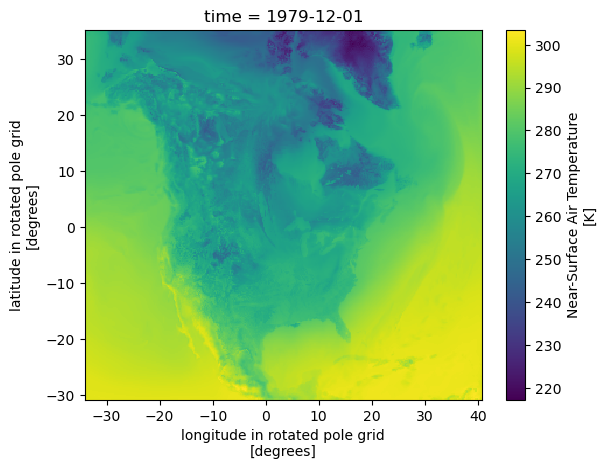

In [17]:
ds = xr.open_dataset(f'/expl7/climato/arch/bcs/series/197912/tas_bcs_197912_se.nc')
display(ds)
ds.tas.isel(time=0).plot()

## Checking the simulation 'bcs' after extraction with ObsFlow

<xarray.Dataset>
Dimensions:       (rlat: 300, rlon: 340, time: 20456)
Coordinates:
    lat           (rlat, rlon) float64 ...
    lon           (rlat, rlon) float64 ...
  * rlat          (rlat) float64 -30.71 -30.49 -30.27 ... 34.63 34.85 35.07
  * rlon          (rlon) float64 -33.99 -33.77 -33.55 ... 40.15 40.37 40.59
    rotated_pole  |S1 ...
  * time          (time) datetime64[ns] 1979-01-01 ... 1985-12-31T21:00:00
Data variables:
    tas           (time, rlat, rlon) float32 ...
Attributes: (12/43)
    Conventions:                    CF-1.6
    NCO:                            4.4.4
    cat:_data_format_:              nc
    cat:activity:                   MRCC5
    cat:code:                       bcs
    cat:date_end:                   1979-01-31 23:00:00
    ...                             ...
    ouranos_domain_name:            AMNO22d2 
    ouranos_run_id:                 bcs OURALIB 1.4.1
    product:                        output
    project_id:                     
    rcm_version_id:                 v3331
    reference:                      http://www.ouranos.ca

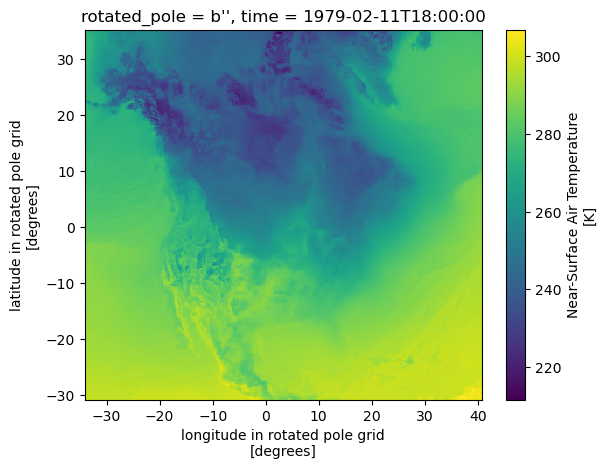

In [6]:
import xarray as xr

ds = xr.open_dataset('/scen3/braun/data/obs_synthese23/extracted/MRCC5_ECMWF-ERAint75_OURANOS_CRCM5_historical_NAM-22_bcs_D_extracted.zarr', engine='zarr')
display(ds)
display(ds.tas.isel(time=334).plot())


In [4]:
ds.tas

<xarray.DataArray 'tas' (time: 20456, rlat: 300, rlon: 340)>
[2086512000 values with dtype=float32]
Coordinates:
    lat           (rlat, rlon) float64 ...
    lon           (rlat, rlon) float64 ...
  * rlat          (rlat) float64 -30.71 -30.49 -30.27 ... 34.63 34.85 35.07
  * rlon          (rlon) float64 -33.99 -33.77 -33.55 ... 40.15 40.37 40.59
    rotated_pole  |S1 ...
  * time          (time) datetime64[ns] 1979-01-01 ... 1985-12-31T21:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   time: point
    grid_mapping:   rotated_pole
    level_desc:     Height
    long_name:      Near-Surface Air Temperature
    realm:          atmos
    standard_name:  air_temperature
    units:          K

## Checking the indicators/climatology for the simulation 'bcs'

#### Indicators

In [20]:
import numpy as np

ds = xr.open_dataset('/scen3/braun/data/obs_synthese23/indicators/MRCC5_ECMWF-ERAint75_OURANOS_CRCM5_historical_NAM-22_bcs_QS-DEC_indicators.zarr', engine='zarr')
display(ds)
#display(ds.tg_mean.isel(time=0).plot())
display(ds.isel(time=0).mean().values)

var = 'tg_mean'
for t in ds.time:
    print(f'time: {np.datetime_as_string(t, "D")} - min={ds[var].sel(time=t).min().values:.4f}, '
          f'mean={ds[var].sel(time=t).mean().values:.4f} max={ds[var].sel(time=t).max().values:.4f}')

<xarray.Dataset>
Dimensions:       (rlat: 300, rlon: 340, time: 28)
Coordinates:
    lat           (rlat, rlon) float64 ...
    lon           (rlat, rlon) float64 ...
  * rlat          (rlat) float64 -30.71 -30.49 -30.27 ... 34.63 34.85 35.07
  * rlon          (rlon) float64 -33.99 -33.77 -33.55 ... 40.15 40.37 40.59
    rotated_pole  |S1 ...
  * time          (time) datetime64[ns] 1979-03-01 1979-06-01 ... 1985-12-01
Data variables:
    tg_mean       (time, rlat, rlon) float32 ...
    tg_std        (time, rlat, rlon) float32 ...
Attributes: (12/43)
    Conventions:                    CF-1.6
    NCO:                            4.4.4
    cat:_data_format_:              zarr
    cat:activity:                   MRCC5
    cat:code:                       bcs
    cat:date_end:                   1985-12-31 21:00:00
    ...                             ...
    ouranos_domain_name:            AMNO22d2 
    ouranos_run_id:                 bcs OURALIB 1.4.1
    product:                        output
    project_id:                     
    rcm_version_id:                 v3331
    reference:                      http://www.ouranos.ca

<bound method Mapping.values of <xarray.Dataset>
Dimensions:       ()
Coordinates:
    rotated_pole  |S1 ...
    time          datetime64[ns] 1979-03-01
Data variables:
    tg_mean       float32 279.0
    tg_std        float32 5.043>

time: 1979-03-01 - min=241.0232, mean=278.9724 max=302.1214
time: 1979-06-01 - min=259.3913, mean=288.7936 max=305.4960
time: 1979-09-01 - min=235.9968, mean=282.9946 max=301.5359
time: 1979-12-01 - min=228.6711, mean=273.8542 max=300.4240
time: 1980-03-01 - min=242.8440, mean=279.3270 max=302.8224
time: 1980-06-01 - min=259.8972, mean=288.9801 max=306.4326
time: 1980-09-01 - min=238.1228, mean=282.7019 max=301.4793
time: 1980-12-01 - min=222.6767, mean=273.8539 max=300.8954
time: 1981-03-01 - min=239.0658, mean=279.4664 max=302.3669
time: 1981-06-01 - min=259.1385, mean=289.0762 max=307.6968
time: 1981-09-01 - min=239.6711, mean=282.9706 max=301.4143
time: 1981-12-01 - min=228.0534, mean=273.2925 max=300.4935
time: 1982-03-01 - min=242.1443, mean=278.6865 max=302.1113
time: 1982-06-01 - min=258.7858, mean=288.5000 max=305.8276
time: 1982-09-01 - min=238.6552, mean=282.3377 max=301.6522
time: 1982-12-01 - min=226.8051, mean=273.3568 max=301.1234
time: 1983-03-01 - min=238.0423, mean=27

In [12]:
import numpy as np
np.datetime_as_string(ds.time[0], 'D')

'1979-03-01'

### Climatology from indicators

<xarray.Dataset>
Dimensions:            (rlat: 300, rlon: 340, month: 12, period: 1)
Coordinates:
    lat                (rlat, rlon) float64 ...
    lon                (rlat, rlon) float64 ...
  * month              (month) <U3 'JAN' 'FEB' 'MAR' 'APR' ... 'OCT' 'NOV' 'DEC'
  * period             (period) <U9 '1980-1985'
  * rlat               (rlat) float64 -30.71 -30.49 -30.27 ... 34.63 34.85 35.07
  * rlon               (rlon) float64 -33.99 -33.77 -33.55 ... 40.15 40.37 40.59
    rotated_pole       |S1 ...
Data variables:
    tg_mean_clim-mean  (period, month, rlat, rlon) float32 ...
    tg_mean_clim-std   (period, month, rlat, rlon) float32 ...
    tg_std_clim-mean   (period, month, rlat, rlon) float32 ...
    tg_std_clim-total  (period, month, rlat, rlon) float32 ...
Attributes: (12/43)
    Conventions:                    CF-1.6
    NCO:                            4.4.4
    cat:_data_format_:              zarr
    cat:activity:                   MRCC5
    cat:code:                       bcs
    cat:date_end:                   1985-12-01 00:00:00
    ...                             ...
    ouranos_domain_name:            AMNO22d2 
    ouranos_run_id:                 bcs OURALIB 1.4.1
    product:                        output
    project_id:                     
    rcm_version_id:                 v3331
    reference:                      http://www.ouranos.ca

array([[0.46876046, 0.47239986, 0.45400673, ..., 3.4659662 , 3.7552946 ,
        3.9352086 ],
       [0.49695572, 0.48974925, 0.48730856, ..., 3.5138776 , 3.711804  ,
        3.89228   ],
       [0.5153304 , 0.5321766 , 0.5266485 , ..., 3.3133748 , 3.4845057 ,
        3.821191  ],
       ...,
       [5.948813  , 6.295822  , 6.6765785 , ..., 1.5778035 , 1.5600201 ,
        1.8406893 ],
       [6.443227  , 6.6681485 , 6.522146  , ..., 1.6644714 , 1.7676688 ,
        1.6498983 ],
       [6.205223  , 6.7433305 , 6.752182  , ..., 2.6731086 , 2.5570834 ,
        1.6376859 ]], dtype=float32)

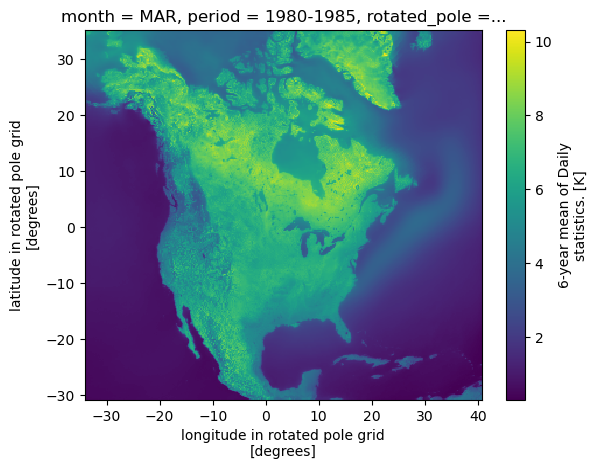

In [6]:
import xarray as xr

ds = xr.open_dataset('/scen3/braun/data/obs_synthese23/climatology/MRCC5_ECMWF-ERAint75_OURANOS_CRCM5_historical_NAM-22_bcs_MS_climatology.zarr', engine='zarr')
display(ds)
display(ds['tg_std_clim-mean'].sel(period='1980-1985', month='MAR').plot())
display(ds['tg_std_clim-mean'].sel(period='1980-1985', month='MAR').values)

## Checking the climatology from properties calculation

<xarray.Dataset>
Dimensions:       (rlat: 300, rlon: 340, month: 12, period: 1, season: 4)
Coordinates:
    lat           (rlat, rlon) float64 ...
    lon           (rlat, rlon) float64 ...
  * month         (month) <U3 'JAN' 'FEB' 'MAR' 'APR' ... 'OCT' 'NOV' 'DEC'
  * period        (period) <U9 '1980-1985'
  * rlat          (rlat) float64 -30.71 -30.49 -30.27 ... 34.63 34.85 35.07
  * rlon          (rlon) float64 -33.99 -33.77 -33.55 ... 40.15 40.37 40.59
    rotated_pole  |S1 ...
  * season        (season) <U3 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    tas_mean_ann  (period, rlat, rlon) float32 ...
    tas_mean_mon  (period, month, rlat, rlon) float32 ...
    tas_mean_sea  (period, season, rlat, rlon) float32 ...
    tas_std_ann   (period, rlat, rlon) float32 ...
    tas_std_mon   (period, month, rlat, rlon) float32 ...
    tas_std_sea   (period, season, rlat, rlon) float32 ...
Attributes: (12/42)
    Conventions:                    CF-1.6
    NCO:                            4.4.4
    cat:_data_format_:              zarr
    cat:activity:                   MRCC5
    cat:code:                       bcs
    cat:date_end:                   1985-12-31 21:00:00
    ...                             ...
    ouranos_domain_name:            AMNO22d2 
    ouranos_run_id:                 bcs OURALIB 1.4.1
    product:                        output
    project_id:                     
    rcm_version_id:                 v3331
    reference:                      http://www.ouranos.ca

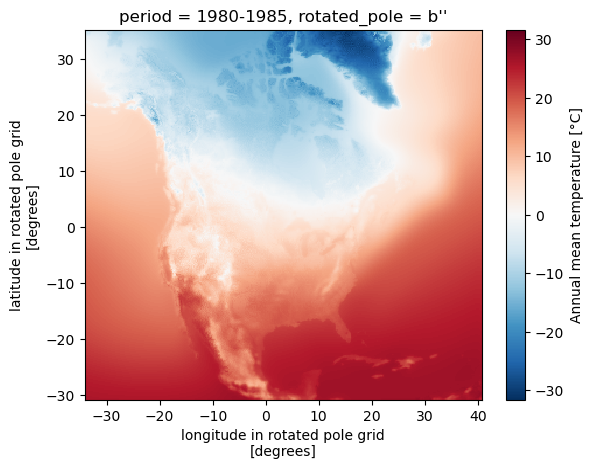

In [18]:
import xarray as xr

ds = xr.open_dataset('/scen3/braun/data/obs_synthese23/climatology/MRCC5_ECMWF-ERAint75_OURANOS_CRCM5_historical_NAM-22_bcs_fx_climatology.zarr', engine='zarr')
display(ds)
display(ds.tas_mean_ann.sel(period='1980-1985').plot())

## Compare results with Hélène's calculations

### Opening files for a quicklook check

<xarray.Dataset>
Dimensions:             (time: 1, bnds: 2, height: 1, rlat: 300, rlon: 340,
                         ts: 6)
Coordinates:
  * height              (height) float64 2.0
    lat                 (rlat, rlon) float64 ...
    lon                 (rlat, rlon) float64 ...
  * rlat                (rlat) float64 -30.71 -30.49 -30.27 ... 34.85 35.07
  * rlon                (rlon) float64 -33.99 -33.77 -33.55 ... 40.37 40.59
  * time                (time) datetime64[ns] 1982-07-02T12:00:00
Dimensions without coordinates: bnds, ts
Data variables:
    climatology_bounds  (time, bnds) datetime64[ns] ...
    poids               (time) float32 ...
    rotated_pole        |S1 ...
    time_vectors        (time, ts) float32 ...
    tas                 (time, rlat, rlon) float64 ...
Attributes: (12/22)
    Conventions:                    CF-1.6
    contact:                        paquin.dominique@ouranos.ca
    comment:                        CRCM5 v3331 0.22 deg AMNO22d2 L56 S17-15m...
    creation_date:                  2017-12-07 
    experiment:                     simulation de reference 
    experiment_id:                  bcs 
    ...                             ...
    ouranos_run_id:                 bcs OURALIB 1.4.1
    product:                        output
    reference:                      http://www.ouranos.ca
    nco_openmp_thread_number:       1
    history:                        Thu Jul 18 19:00:35 2019: ncatted -a long...
    NCO:                            4.6.7

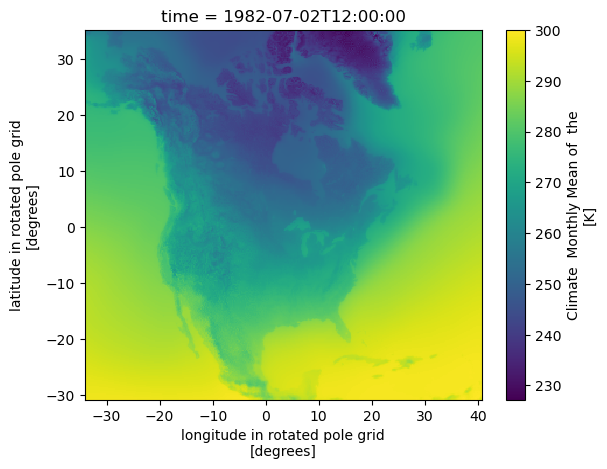

In [2]:
import matplotlib.pyplot as plt
from pathlib import Path
import xarray as xr

expl_dir = Path('/expl6/climato/diagclim/bcs/1980_1985/tas/')
clim_dir = Path('/scen3/braun/data/obs_synthese23/climatology/')

# check the files
ind = ['climmean', 'stdinter', 'stdintra']
h_ds = xr.open_dataset(expl_dir / f'tas_bcs_01_1980_1985_{ind[0]}.nc')
display(h_ds)
display(h_ds.tas.isel(time=0).plot())

### The data to compare to from properties

<xarray.Dataset>
Dimensions:       (rlat: 300, rlon: 340, month: 12, period: 1, season: 4)
Coordinates:
    lat           (rlat, rlon) float64 ...
    lon           (rlat, rlon) float64 ...
  * month         (month) <U3 'JAN' 'FEB' 'MAR' 'APR' ... 'OCT' 'NOV' 'DEC'
  * period        (period) <U9 '1980-1985'
  * rlat          (rlat) float64 -30.71 -30.49 -30.27 ... 34.63 34.85 35.07
  * rlon          (rlon) float64 -33.99 -33.77 -33.55 ... 40.15 40.37 40.59
    rotated_pole  |S1 ...
  * season        (season) <U3 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    tas_mean_ann  (period, rlat, rlon) float32 ...
    tas_mean_mon  (period, month, rlat, rlon) float32 ...
    tas_mean_sea  (period, season, rlat, rlon) float32 ...
    tas_std_ann   (period, rlat, rlon) float32 ...
    tas_std_mon   (period, month, rlat, rlon) float32 ...
    tas_std_sea   (period, season, rlat, rlon) float32 ...
Attributes: (12/42)
    Conventions:                    CF-1.6
    NCO:                            4.4.4
    cat:_data_format_:              zarr
    cat:activity:                   MRCC5
    cat:code:                       bcs
    cat:date_end:                   1985-12-31 21:00:00
    ...                             ...
    ouranos_domain_name:            AMNO22d2 
    ouranos_run_id:                 bcs OURALIB 1.4.1
    product:                        output
    project_id:                     
    rcm_version_id:                 v3331
    reference:                      http://www.ouranos.ca

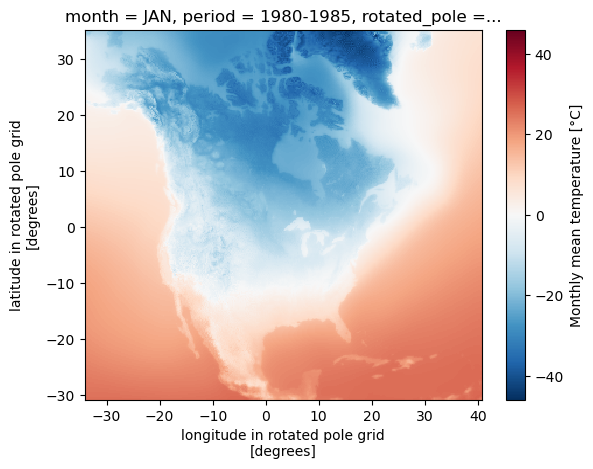

In [3]:
ds_diag = xr.open_dataset(clim_dir / 'MRCC5_ECMWF-ERAint75_OURANOS_CRCM5_historical_NAM-22_bcs_fx_climatology.zarr', engine='zarr')
display(ds_diag)
display(ds_diag.tas_mean_mon.sel(period='1980-1985', month='JAN').plot())

### The data to compare to from indicator climatology

<xarray.Dataset>
Dimensions:       (rlat: 300, rlon: 340, month: 12, period: 1)
Coordinates:
    lat           (rlat, rlon) float64 ...
    lon           (rlat, rlon) float64 ...
  * month         (month) <U3 'JAN' 'FEB' 'MAR' 'APR' ... 'OCT' 'NOV' 'DEC'
  * period        (period) <U9 '1980-1985'
  * rlat          (rlat) float64 -30.71 -30.49 -30.27 ... 34.63 34.85 35.07
  * rlon          (rlon) float64 -33.99 -33.77 -33.55 ... 40.15 40.37 40.59
    rotated_pole  |S1 ...
Data variables:
    tg_mean       (period, month, rlat, rlon) float32 ...
    tg_mean_std   (period, month, rlat, rlon) float32 ...
Attributes: (12/43)
    Conventions:                    CF-1.6
    NCO:                            4.4.4
    cat:_data_format_:              zarr
    cat:activity:                   MRCC5
    cat:code:                       bcs
    cat:date_end:                   1985-12-01 00:00:00
    ...                             ...
    ouranos_domain_name:            AMNO22d2 
    ouranos_run_id:                 bcs OURALIB 1.4.1
    product:                        output
    project_id:                     
    rcm_version_id:                 v3331
    reference:                      http://www.ouranos.ca

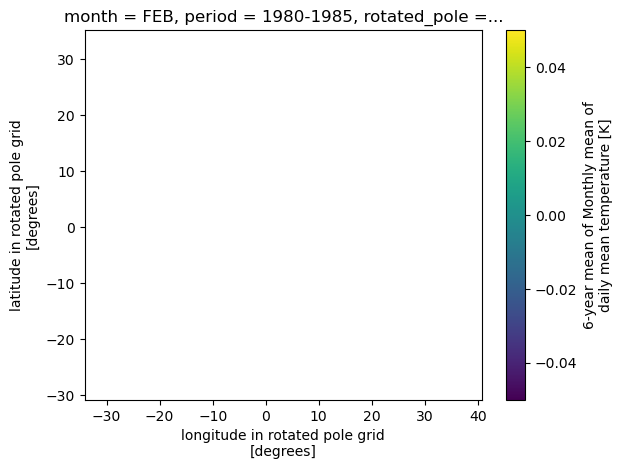

In [4]:
ds_clim = xr.open_dataset(clim_dir / 'MRCC5_ECMWF-ERAint75_OURANOS_CRCM5_historical_NAM-22_bcs_MS_climatology.zarr', engine='zarr')
display(ds_clim)
display(ds_clim.tg_mean.sel(period='1980-1985', month='FEB').plot())

### Simple comparison of some fields

In [5]:
diff = h_ds['tas'].isel(time=0).values - 273.15 - ds_diag['tas_mean_mon'].sel(period='1980-1985', month='JAN').values
print(f'Diff max = {diff.max()}, min = {diff.min()}')

Diff max = 0.00010070800783523737, min = -0.00010274251297914816


In [6]:
diff = ds_clim['tg_mean'].sel(period='1980-1985', month='JAN').values - h_ds['tas'].isel(time=0).values
print(f'Diff max = {diff.max()}, min = {diff.min()}')

Diff max = nan, min = nan


In [7]:
diff = ds_clim['tg_mean'].sel(period='1980-1985', month='JAN').values - 273.15 - ds_diag['tas_mean_mon'].sel(period='1980-1985', month='JAN').values
print(f'Diff max = {diff.max()}, min = {diff.min()}')

Diff max = nan, min = nan


### Compare All Seasonal Fields

Season DJF


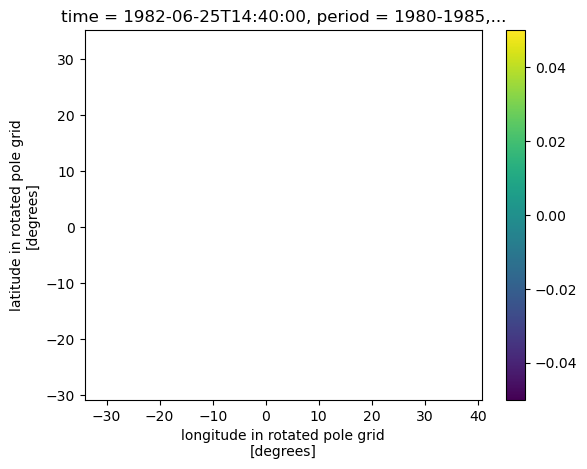

Diff1 max = nan, min = nan
Diff2 max = 1.0204347151297384, min = -1.1672723487570806
Diff3 max = nan, min = nan
Season MAM


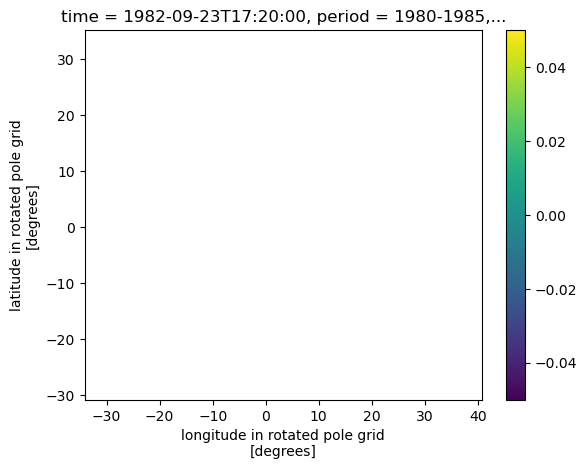

Diff1 max = nan, min = nan
Diff2 max = 6.08195429663283e-05, min = -5.710435942773984e-05
Diff3 max = nan, min = nan
Season JJA


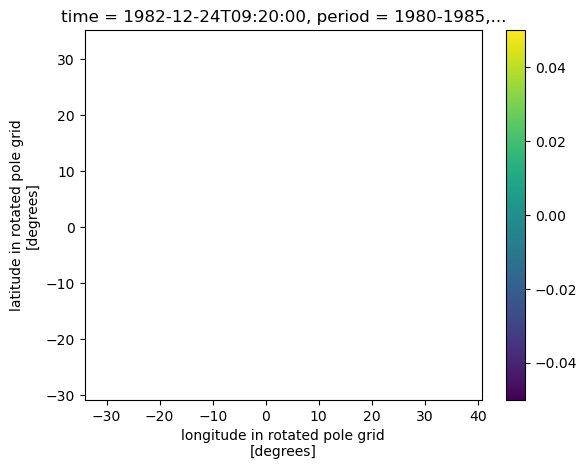

Diff1 max = nan, min = nan
Diff2 max = 5.3577146729821834e-05, min = -7.838926450176587e-05
Diff3 max = nan, min = nan
Season SON


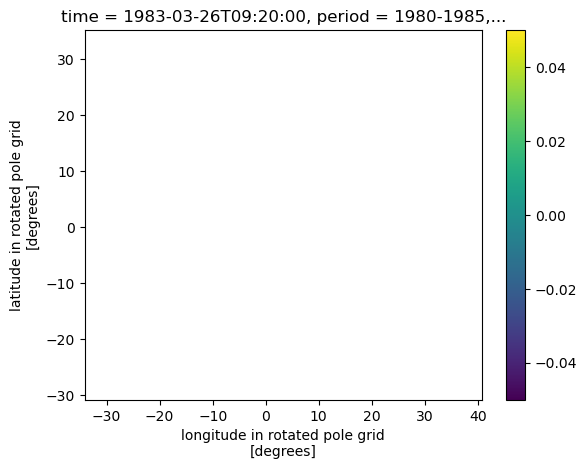

Diff1 max = nan, min = nan
Diff2 max = 5.666432372208874e-05, min = -6.19406228565822e-05
Diff3 max = nan, min = nan


In [8]:
import xarray as xr
import matplotlib.pyplot as plt

ds_diag = xr.open_dataset(clim_dir / 'MRCC5_ECMWF-ERAint75_OURANOS_CRCM5_historical_NAM-22_bcs_fx_climatology.zarr', engine='zarr')
ds_clim = xr.open_dataset(clim_dir / f'MRCC5_ECMWF-ERAint75_OURANOS_CRCM5_historical_NAM-22_bcs_QS-DEC_climatology.zarr', engine='zarr')
#test_sea = 'SON'
clim_period = '1980-1985'
for sea in ['DJF', 'MAM', 'JJA', 'SON']:
    print(f'Season {sea}')
    ds_h = xr.open_dataset(expl_dir / f'tas_bcs_{sea}_1980_1985_climmean.nc')
    diff1 = ds_h['tas'].isel(time=0).values - ds_clim['tg_mean'].sel(period=clim_period, season=sea).values
    #display((ds_h['tas'].isel(time=0)-273.15).plot(cmap='RdBu_r'))
    #plt.show()
    #display((ds_clim['tg_mean'].sel(period='1980-1985', season=sea)-273.15).plot(cmap='RdBu_r'))
    #plt.show()
    diff2 = ds_h['tas'].isel(time=0).values - 273.15 - ds_diag['tas_mean_sea'].sel(period='1980-1985', season=sea).values
    diff3 = ds_clim['tg_mean'].sel(period=clim_period, season=sea).values - 273.15 - ds_diag['tas_mean_sea'].sel(period='1980-1985', season=sea).values
    da_diff = ds_h['tas'].isel(time=0) - ds_clim['tg_mean'].sel(period=clim_period, season=sea)
    display(da_diff.plot())
    plt.show()
    print(f'Diff1 max = {diff1.max()}, min = {diff1.min()}\nDiff2 max = {diff2.max()}, min = {diff2.min()}\nDiff3 max = {diff3.max()}, min = {diff3.min()}')

In [9]:
h_ds = xr.open_dataset(expl_dir / 'tas_bcs_MAM_1980_1985_climmean.nc')
display(h_ds)
ds_clim = xr.open_dataset(clim_dir / 'MRCC5_ECMWF-ERAint75_OURANOS_CRCM5_historical_NAM-22_bcs_QS-DEC_climatology.zarr', engine='zarr')
display(ds_clim)

<xarray.Dataset>
Dimensions:             (time: 1, bnds: 2, height: 1, rlat: 300, rlon: 340,
                         ts: 6)
Coordinates:
  * height              (height) float64 2.0
    lat                 (rlat, rlon) float64 ...
    lon                 (rlat, rlon) float64 ...
  * rlat                (rlat) float64 -30.71 -30.49 -30.27 ... 34.85 35.07
  * rlon                (rlon) float64 -33.99 -33.77 -33.55 ... 40.37 40.59
  * time                (time) datetime64[ns] 1982-09-23T17:20:00
Dimensions without coordinates: bnds, ts
Data variables:
    climatology_bounds  (time, bnds) datetime64[ns] ...
    poids               (time) float32 ...
    rotated_pole        |S1 ...
    time_vectors        (time, ts) float32 ...
    tas                 (time, rlat, rlon) float64 ...
Attributes: (12/23)
    Conventions:                    CF-1.6
    contact:                        paquin.dominique@ouranos.ca
    comment:                        CRCM5 v3331 0.22 deg AMNO22d2 L56 S17-15m...
    creation_date:                  2017-12-07 
    experiment:                     simulation de reference 
    experiment_id:                  bcs 
    ...                             ...
    product:                        output
    reference:                      http://www.ouranos.ca
    nco_openmp_thread_number:       1
    history_of_appended_files:      Thu Jul 18 19:02:41 2019: Appended file /...
    history:                        Thu Jul 18 19:03:15 2019: ncatted -a long...
    NCO:                            4.6.7

<xarray.Dataset>
Dimensions:       (rlat: 300, rlon: 340, period: 1, season: 4)
Coordinates:
    lat           (rlat, rlon) float64 ...
    lon           (rlat, rlon) float64 ...
  * period        (period) <U9 '1980-1985'
  * rlat          (rlat) float64 -30.71 -30.49 -30.27 ... 34.63 34.85 35.07
  * rlon          (rlon) float64 -33.99 -33.77 -33.55 ... 40.15 40.37 40.59
    rotated_pole  |S1 ...
  * season        (season) <U3 'MAM' 'JJA' 'SON' 'DJF'
Data variables:
    tg_mean       (period, season, rlat, rlon) float32 ...
    tg_mean_std   (period, season, rlat, rlon) float32 ...
Attributes: (12/43)
    Conventions:                    CF-1.6
    NCO:                            4.4.4
    cat:_data_format_:              zarr
    cat:activity:                   MRCC5
    cat:code:                       bcs
    cat:date_end:                   1985-12-01 00:00:00
    ...                             ...
    ouranos_domain_name:            AMNO22d2 
    ouranos_run_id:                 bcs OURALIB 1.4.1
    product:                        output
    project_id:                     
    rcm_version_id:                 v3331
    reference:                      http://www.ouranos.ca

In [10]:
diff = h_ds['tas'].isel(time=0).values - ds_clim['tg_mean'].sel(period='1980-1985', season='MAM').values
print(f'Diff max = {diff.max()}, min = {diff.min()}')

Diff max = nan, min = nan


### Compare All Monthly Fields

------------------------------------------ Month JAN - climmean ------------------------------------------------


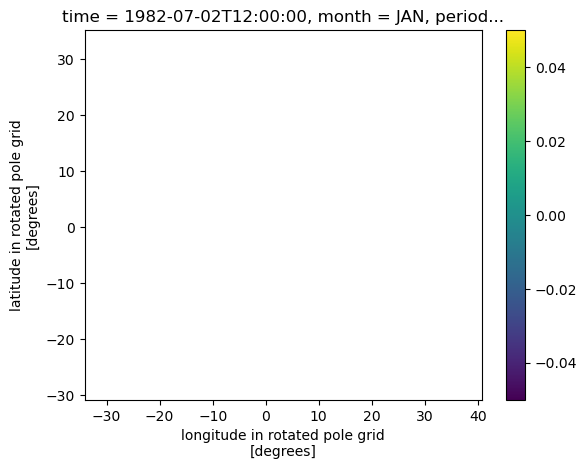

Diff hel - clim: max abs diff = nan


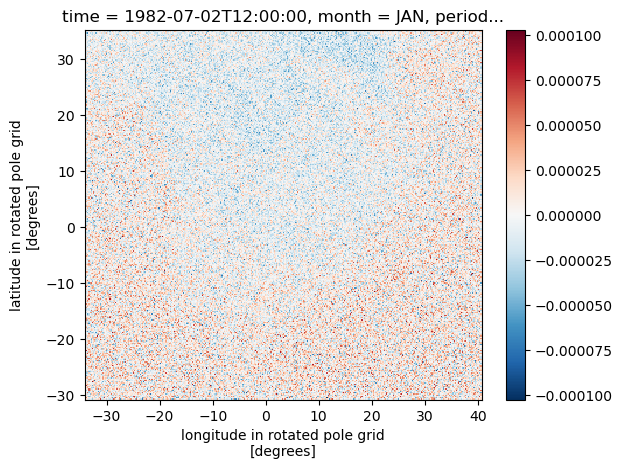

Diff hel - prop: max abs diff = 0.00010274251297914816
Diff clim - prop: max abs diff = nan
------------------------------------------ Month FEB - climmean ------------------------------------------------


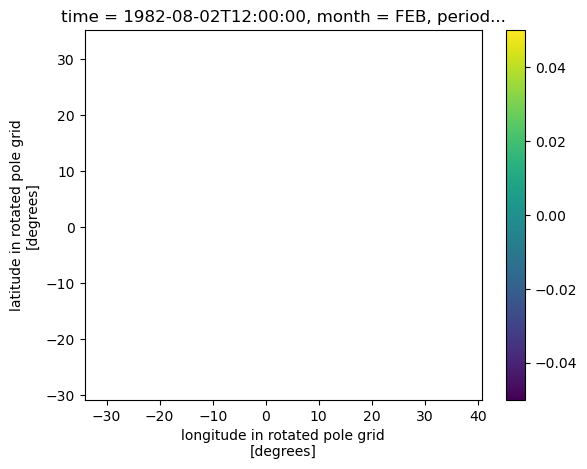

Diff hel - clim: max abs diff = nan


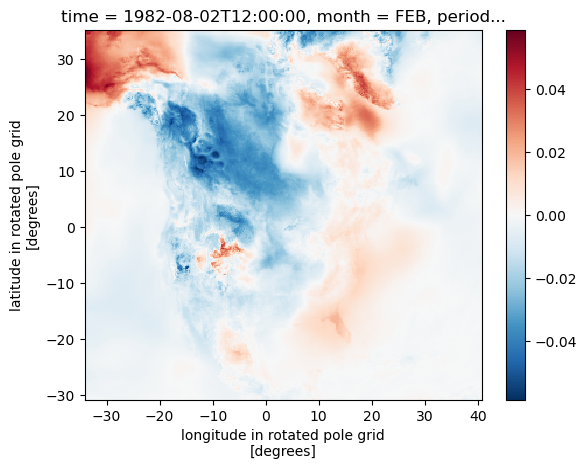

Diff hel - prop: max abs diff = 0.05865488052370438
Diff clim - prop: max abs diff = nan
------------------------------------------ Month MAR - climmean ------------------------------------------------


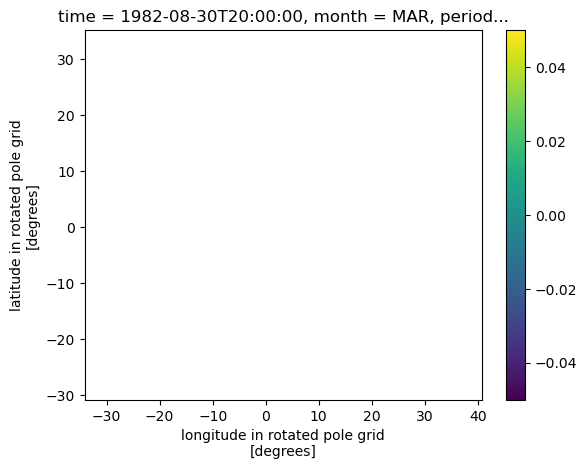

Diff hel - clim: max abs diff = nan


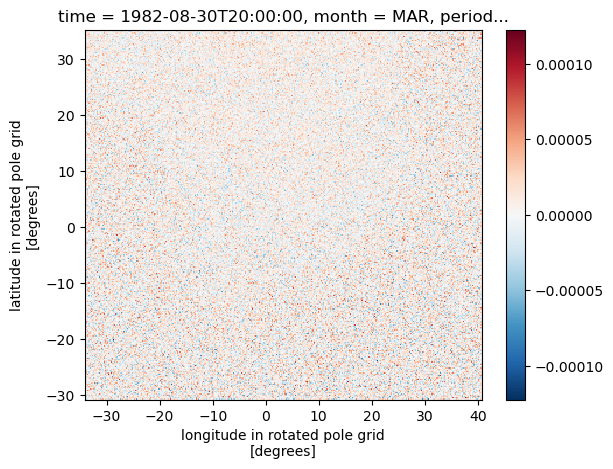

Diff hel - prop: max abs diff = 0.00012232462569272684
Diff clim - prop: max abs diff = nan
------------------------------------------ Month APR - climmean ------------------------------------------------


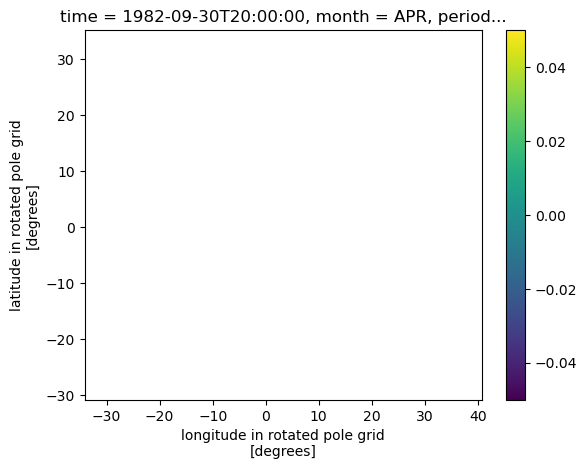

Diff hel - clim: max abs diff = nan


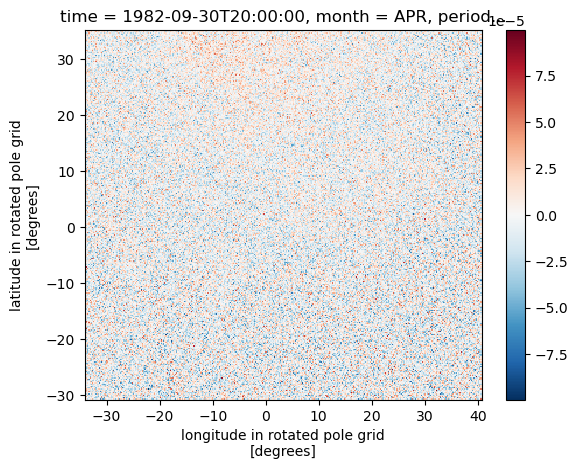

Diff hel - prop: max abs diff = 9.956359861007513e-05
Diff clim - prop: max abs diff = nan
------------------------------------------ Month MAY - climmean ------------------------------------------------


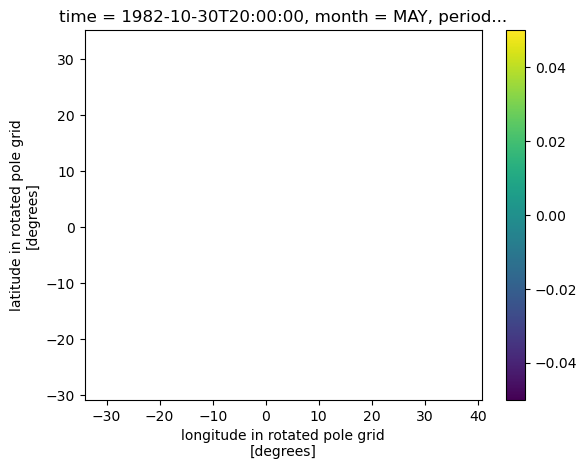

Diff hel - clim: max abs diff = nan


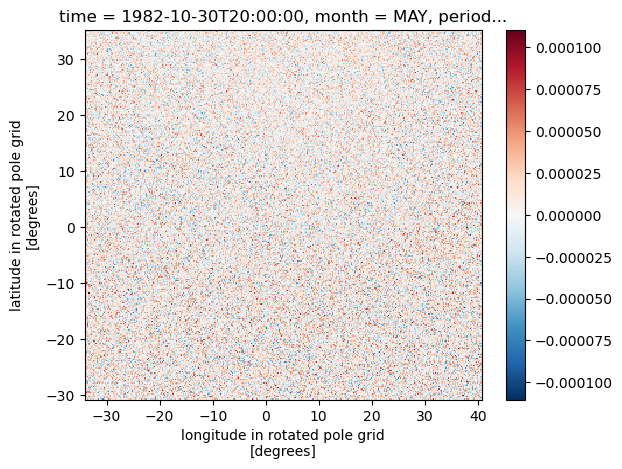

Diff hel - prop: max abs diff = 0.00011024475099929987
Diff clim - prop: max abs diff = nan
------------------------------------------ Month JUN - climmean ------------------------------------------------


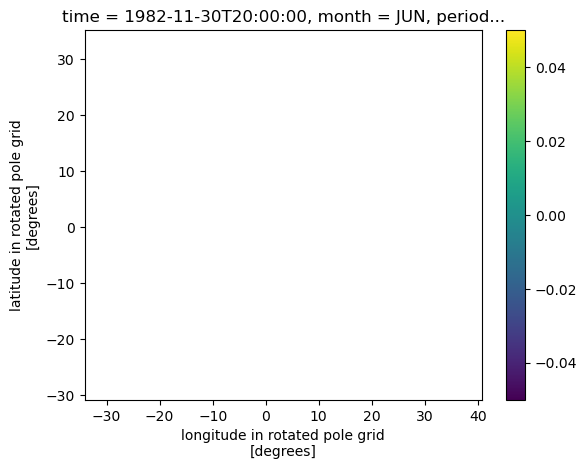

Diff hel - clim: max abs diff = nan


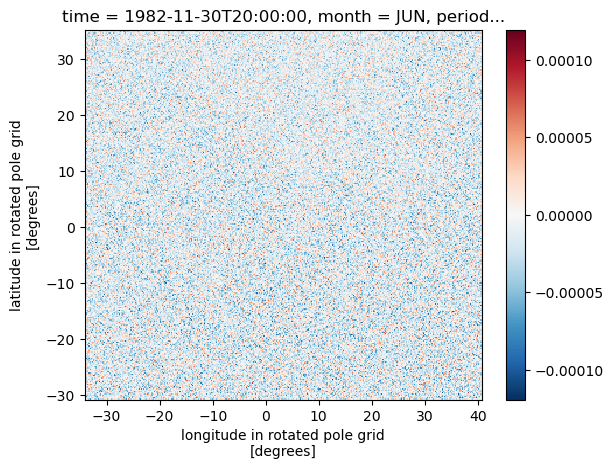

Diff hel - prop: max abs diff = 0.0001192728678347521
Diff clim - prop: max abs diff = nan
------------------------------------------ Month JUL - climmean ------------------------------------------------


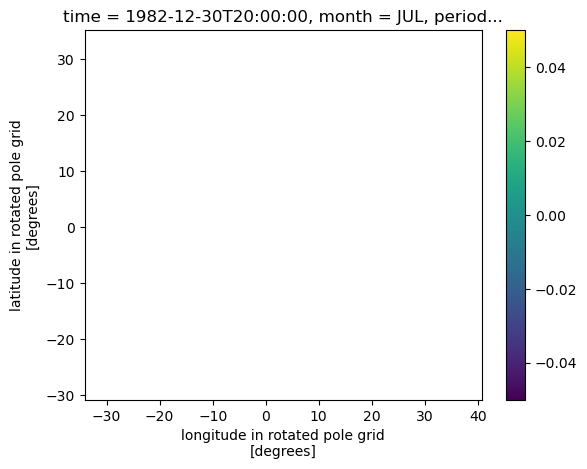

Diff hel - clim: max abs diff = nan


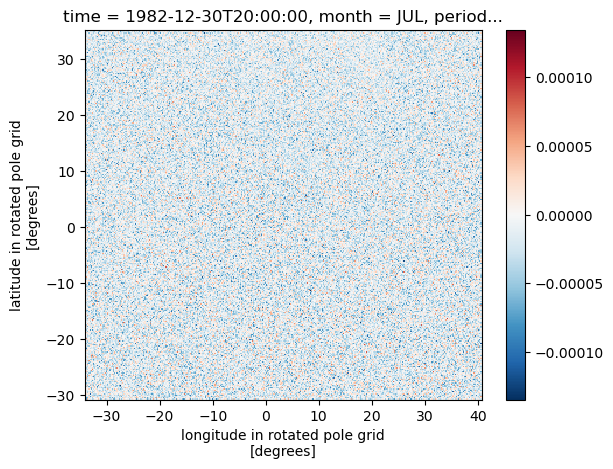

Diff hel - prop: max abs diff = 0.0001345316568972521
Diff clim - prop: max abs diff = nan
------------------------------------------ Month AUG - climmean ------------------------------------------------


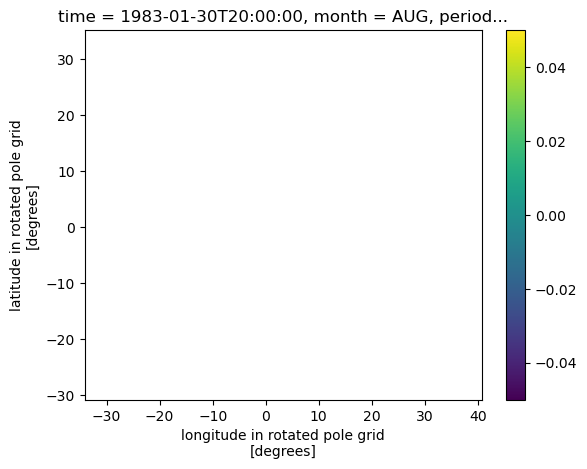

Diff hel - clim: max abs diff = nan


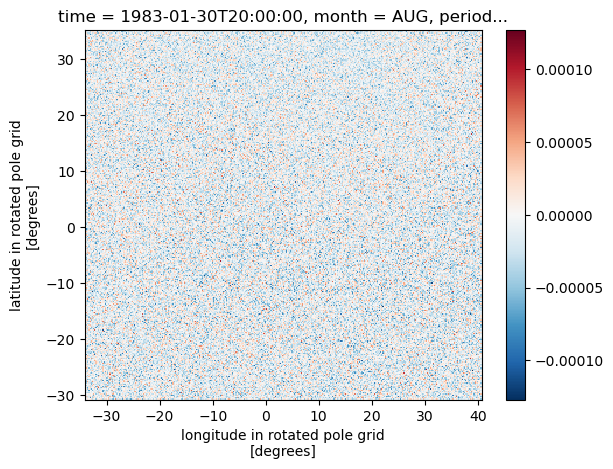

Diff hel - prop: max abs diff = 0.0001269022623660021
Diff clim - prop: max abs diff = nan
------------------------------------------ Month SEP - climmean ------------------------------------------------


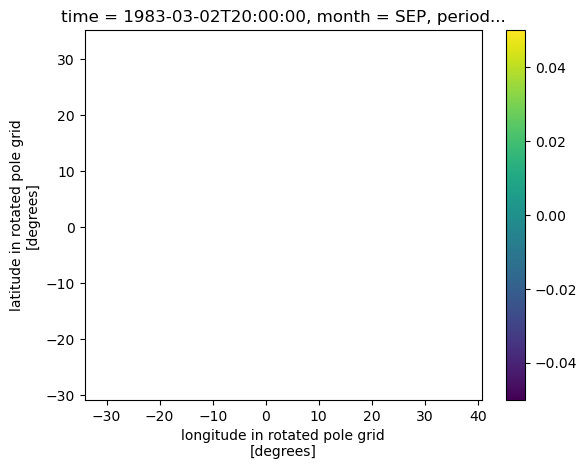

Diff hel - clim: max abs diff = nan


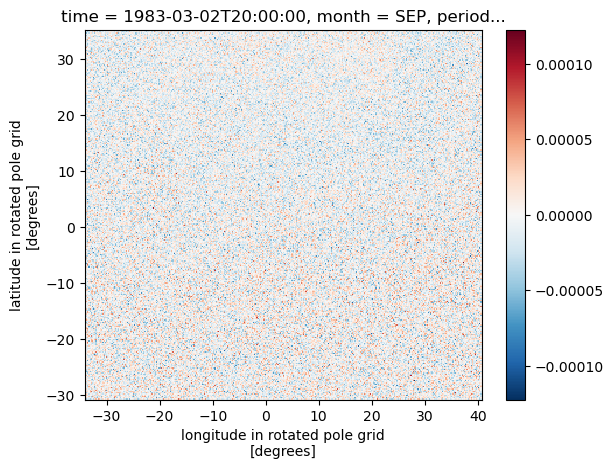

Diff hel - prop: max abs diff = 0.00012245178220382513
Diff clim - prop: max abs diff = nan
------------------------------------------ Month OCT - climmean ------------------------------------------------


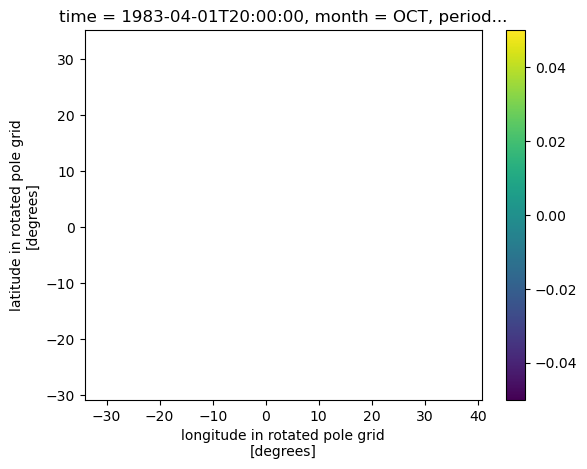

Diff hel - clim: max abs diff = nan


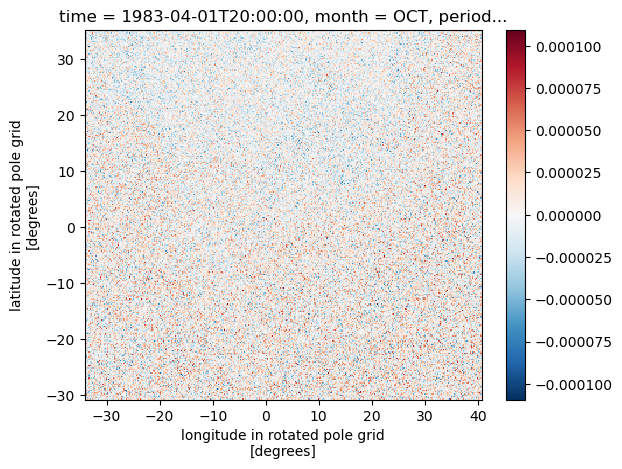

Diff hel - prop: max abs diff = 0.00010929107668289362
Diff clim - prop: max abs diff = nan
------------------------------------------ Month NOV - climmean ------------------------------------------------


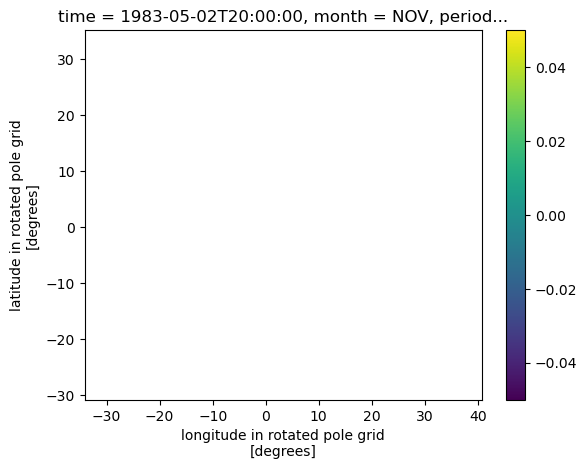

Diff hel - clim: max abs diff = nan


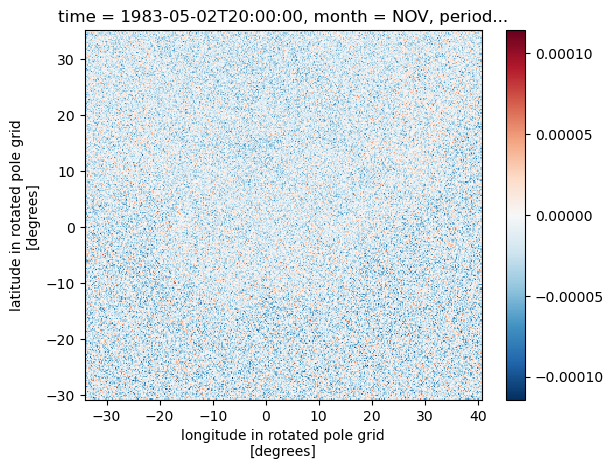

Diff hel - prop: max abs diff = 0.00011418660477602316
Diff clim - prop: max abs diff = nan
------------------------------------------ Month DEC - climmean ------------------------------------------------


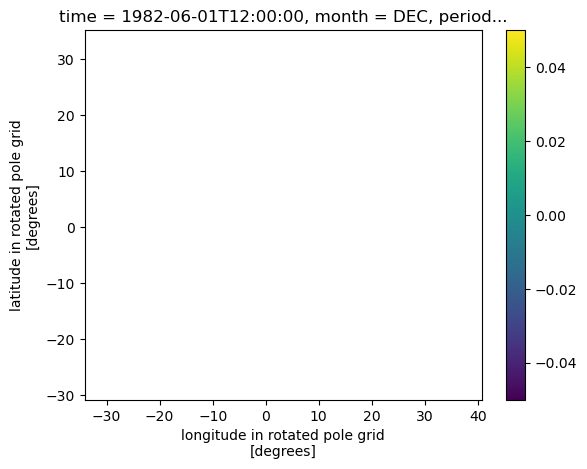

Diff hel - clim: max abs diff = nan


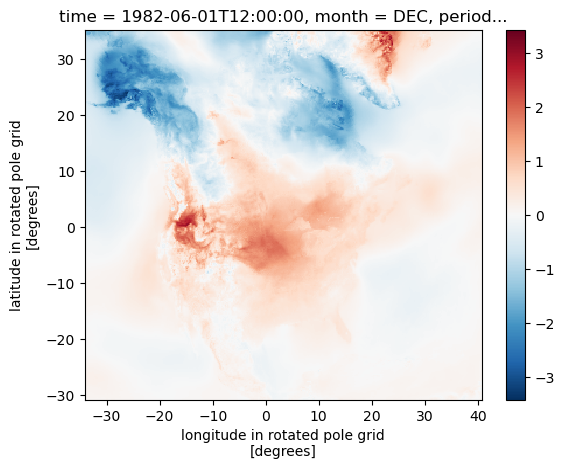

Diff hel - prop: max abs diff = 3.4245278676350495
Diff clim - prop: max abs diff = nan


In [11]:
import xarray as xr
import matplotlib.pyplot as plt

ds_diag = xr.open_dataset(clim_dir / 'MRCC5_ECMWF-ERAint75_OURANOS_CRCM5_historical_NAM-22_bcs_fx_climatology.zarr', engine='zarr')
#display(ds_diag)
ds_clim = xr.open_dataset(clim_dir / f'MRCC5_ECMWF-ERAint75_OURANOS_CRCM5_historical_NAM-22_bcs_MS_climatology.zarr', engine='zarr')
#display(ds_clim)
#test_mon = 'JAN'
da_diff = xr.DataArray()

# define the var name in the three files
# Hélènes files, climatology files, diagnostic files
ind_zip = list(zip(['climmean', 'stdinter', 'stdintra'], ['tg_mean', 'tg_mean_std', 'N/A'], ['tas_mean_mon', 'N/A', 'tas_std_mon']))

for hel, clim, prop in [ind_zip[0]]:
    for m, mon in enumerate(['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']):
        print(f'------------------------------------------ Month {mon} - {hel} ------------------------------------------------')
        ds_h = xr.open_dataset(expl_dir / f'tas_bcs_{m+1:02}_1980_1985_{hel}.nc')
        if clim != 'N/A':
            diff1 = ds_h['tas'].isel(time=0).values - ds_clim[clim].sel(period='1980-1985', month=mon).values
            da_diff = ds_h['tas'].isel(time=0) - ds_clim[clim].sel(period='1980-1985', month=mon)
            display(da_diff.plot())
            plt.show()
            print(f'Diff hel - clim: max abs diff = {max(abs(diff1.max()), abs(diff1.min()))}')
        if prop != 'N/A':
            k2c = 0 if hel == 'stdintra' else 273.15
            diff2 = ds_h['tas'].isel(time=0).values - k2c - ds_diag[prop].sel(period='1980-1985', month=mon).values
            da_diff = ds_h['tas'].isel(time=0) - k2c - ds_diag[prop].sel(period='1980-1985', month=mon)
            display(da_diff.plot())
            plt.show()
            #print(f'Diff hel - prop: max = {diff2.max()}, min = {diff2.min()}')
            print(f'Diff hel - prop: max abs diff = {max(abs(diff2.max()), abs(diff2.min()))}')
        if clim != 'N/A' and prop != 'N/A':
            diff3 = ds_clim[clim].sel(period='1980-1985', month=mon).values - 273.15 - ds_diag[prop].sel(period='1980-1985', month=mon).values
            #print(f'Diff clim - prop: max = {diff3.max()}, min = {diff3.min()}')
            print(f'Diff clim - prop: max abs diff = {max(abs(diff3.max()), abs(diff3.min()))}')

In [69]:
ds_h_DJF = xr.open_dataset(expl_dir / f'tas_bcs_DJF_1980_1985_climmean.nc')
ds_h_MAM = xr.open_dataset(expl_dir / f'tas_bcs_MAM_1980_1985_climmean.nc')
diff = ds_h_DJF['tas'].isel(time=0).values - ds_h_MAM['tas'].isel(time=0).values
diff.min()

-22.697576511770052

### Check Why December Results are Different
#### Check for mean

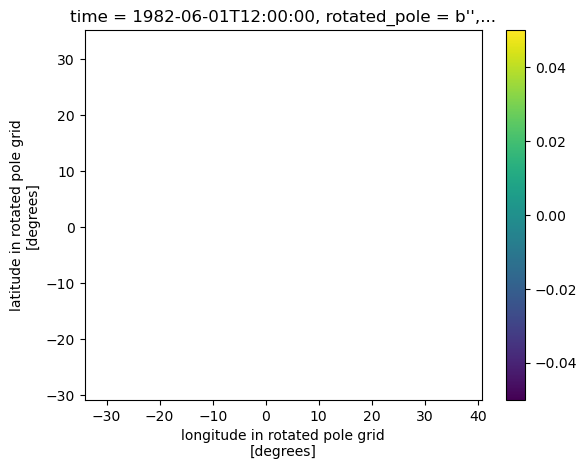

Diff max = nan, min = nan


In [12]:
ds_h = xr.open_dataset(expl_dir / f'tas_bcs_12_1980_1985_climmean.nc')
ds_ind = xr.open_dataset('/scen3/braun/data/obs_synthese23/indicators/MRCC5_ECMWF-ERAint75_OURANOS_CRCM5_historical_NAM-22_bcs_MS_indicators.zarr', engine='zarr')
diff = ds_h['tas'].isel(time=0).values - ds_ind.sel(time=slice('1979-12-01', '1985-11-01')).groupby('time.month').mean('time').sel(month=12).tg_mean.values
da_diff = ds_h['tas'].isel(time=0) - ds_ind.sel(time=slice('1979-12-01', '1985-11-01')).groupby('time.month').mean('time').sel(month=12).tg_mean
display(da_diff.plot())
plt.show()
print(f'Diff max = {diff.max()}, min = {diff.min()}')

#### Check for std

<xarray.Dataset>
Dimensions:             (time: 1, rlat: 300, rlon: 340, bnds: 2, height: 1,
                         ts: 6)
Coordinates:
  * height              (height) float64 2.0
    lat                 (rlat, rlon) float64 ...
    lon                 (rlat, rlon) float64 ...
  * rlat                (rlat) float64 -30.71 -30.49 -30.27 ... 34.85 35.07
  * rlon                (rlon) float64 -33.99 -33.77 -33.55 ... 40.37 40.59
  * time                (time) datetime64[ns] 1982-06-01T12:00:00
Dimensions without coordinates: bnds, ts
Data variables:
    tas                 (time, rlat, rlon) float64 ...
    climatology_bounds  (time, bnds) datetime64[ns] ...
    poids               (time) float32 ...
    rotated_pole        |S1 ...
    time_vectors        (time, ts) float32 ...
Attributes:
    history_of_appended_files:  Thu Jul 18 19:01:49 2019: Appended file /exec...
    nco_openmp_thread_number:   1
    history:                    Thu Jul 18 19:01:50 2019: ncatted -a long_nam...
    NCO:                        4.6.7

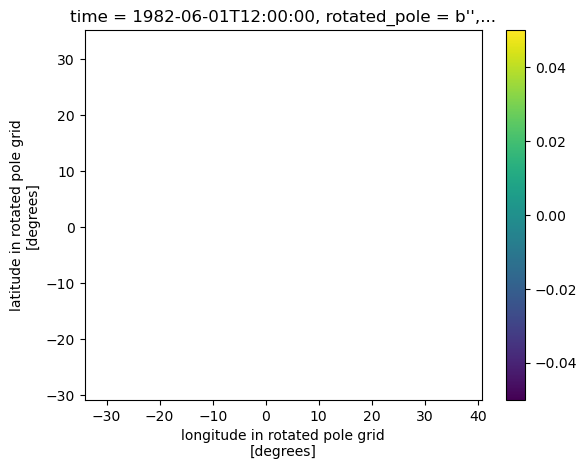

Diff max = nan, min = nan


In [13]:
ds_h = xr.open_dataset(expl_dir / f'tas_bcs_12_1980_1985_stdinter.nc')
display(ds_h)
ds_ind = xr.open_dataset('/scen3/braun/data/obs_synthese23/indicators/MRCC5_ECMWF-ERAint75_OURANOS_CRCM5_historical_NAM-22_bcs_MS_indicators.zarr', engine='zarr')
diff = ds_h['tas'].isel(time=0).values - ds_ind.sel(time=slice('1979-12-01', '1985-11-01')).groupby('time.month').std('time').sel(month=12).tg_mean.values
da_diff = ds_h['tas'].isel(time=0) - ds_ind.sel(time=slice('1979-12-01', '1985-11-01')).groupby('time.month').std('time').sel(month=12).tg_mean
display(da_diff.plot())
plt.show()
print(f'Diff max = {diff.max()}, min = {diff.min()}')
#ds_ind.sel(time=slice('1979-12-01', '1985-11-01')).groupby('time.month').std('time').sel(month=12).tg_mean.plot()

## Result:
## DEC values are different because ObsFlow computes DEC mean and std from 1980-1985, while Hélène calulated all stats from 1979-12 to 1984-11

## Attempting to reproduce the calculation of 'stdintra' and 'stdclim' by Hélène

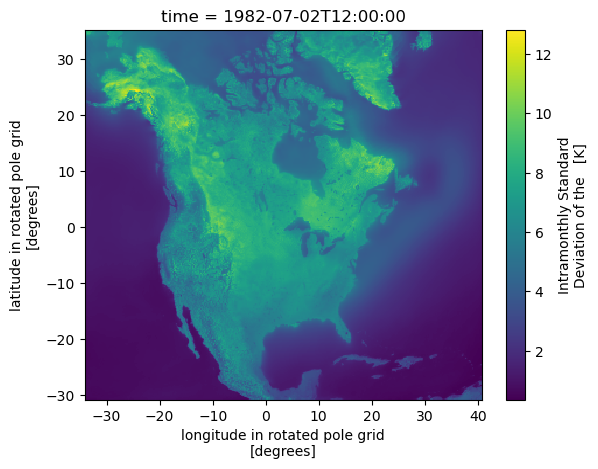

6.042049288058649

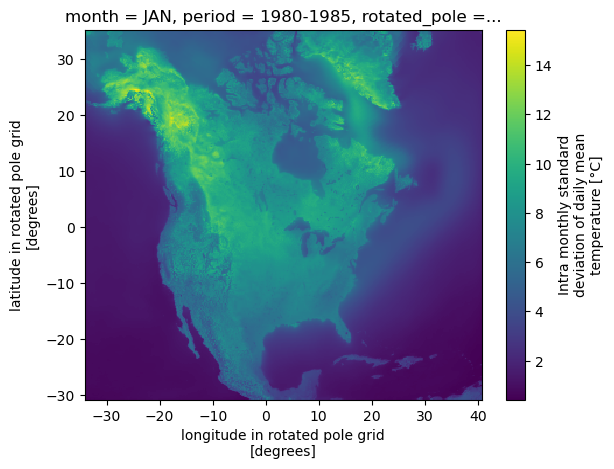

In [15]:
# compare std on 3h values with stdintra for JAN (which overlaps in ObsFlow vs Hélène's calculation)
ds_h = xr.open_dataset(expl_dir / f'tas_bcs_01_1980_1985_stdintra.nc')
display(ds_h.tas.isel(time=0).plot())
plt.show()
ds_diag = xr.open_dataset(clim_dir / 'MRCC5_ECMWF-ERAint75_OURANOS_CRCM5_historical_NAM-22_bcs_fx_climatology.zarr', engine='zarr')
display(ds_diag.tas_std_mon.sel(period='1980-1985', month='JAN').plot())
diff = ds_h['tas'].isel(time=0).values - ds_diag.tas_std_mon.sel(period='1980-1985', month='JAN').values
max(abs(diff.min()), abs(diff.max()))

## Result:
## ObsFlow properties (=std on all data over climatological period) is different from Hélène's 'climintra', when computed both on daily and 3h data. The daily calculations with ObsFlow can be discarded, Hélène calculated on 3h data.

In [2]:
for m in range(1, 84, 12):
    print(m)

1
13
25
37
49
61
73
